## 1. Install and Import Dependencies

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

  Using cached opencv_python-4.5.5.62-cp36-abi3-win_amd64.whl (35.4 MB)
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Using cached opencv_contrib_python-4.5.5.62-cp36-abi3-win_amd64.whl (42.2 MB)
  Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached pya

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## 2. Keypoints using MP Holistic

In [7]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                 # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                  # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION RGB 2 BGR
    return image, results

In [7]:
cv2.cvtColor??

In [9]:
def draw_landmarks(image, results):
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [10]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
    #                         mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                         mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                         ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [11]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [13]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        # cv2.imshow('OpenCV Feed', frame)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [14]:
if results.pose_landmarks:
    landmark_list_pose = results.pose_landmarks.landmark

if results.right_hand_landmarks:
    landmark_list_right_hand = results.right_hand_landmarks.landmark

if results.left_hand_landmarks:
    landmark_list_left_hand = results.left_hand_landmarks.landmark

len(landmark_list_pose)

33

In [15]:
frame

array([[[140, 132, 126],
        [139, 133, 130],
        [138, 133, 134],
        ...,
        [121, 130, 112],
        [123, 131, 114],
        [125, 133, 117]],

       [[139, 132, 123],
        [140, 135, 129],
        [139, 135, 133],
        ...,
        [124, 130, 113],
        [125, 131, 114],
        [127, 133, 117]],

       [[139, 132, 123],
        [139, 134, 126],
        [139, 136, 130],
        ...,
        [125, 130, 117],
        [126, 131, 117],
        [128, 134, 120]],

       ...,

       [[ 96, 107,  99],
        [ 98, 108, 101],
        [ 96, 107,  99],
        ...,
        [203, 194, 183],
        [183, 174, 163],
        [167, 158, 147]],

       [[ 95, 109, 101],
        [ 96, 109, 100],
        [ 95, 107,  96],
        ...,
        [199, 192, 183],
        [184, 177, 169],
        [166, 158, 150]],

       [[ 95, 109, 101],
        [ 95, 108,  98],
        [ 93, 105,  92],
        ...,
        [200, 193, 185],
        [188, 180, 174],
        [181, 173, 167]]

In [16]:
results

mediapipe.python.solution_base.SolutionOutputs

In [17]:
draw_landmarks(frame, results)

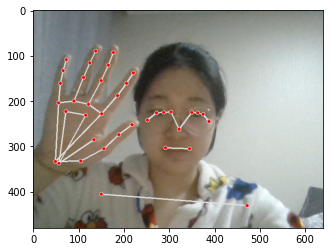

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## 3. Extract Keypoint Values

In [19]:
len(results.pose_landmarks.landmark)

33

In [20]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [21]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [22]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [23]:
result_test = extract_keypoints(results)

In [24]:
result_test.shape

(258,)

In [25]:
result_test[:-10]

array([ 5.04348397e-01,  5.47275722e-01, -1.24241233e+00,  9.99759316e-01,
        5.47159553e-01,  4.69337314e-01, -1.15739048e+00,  9.99671817e-01,
        5.67574024e-01,  4.72625822e-01, -1.15752649e+00,  9.99576449e-01,
        5.86632490e-01,  4.77658898e-01, -1.15787482e+00,  9.99566078e-01,
        4.76334900e-01,  4.68299329e-01, -1.16499352e+00,  9.99669969e-01,
        4.50450510e-01,  4.69195932e-01, -1.16466928e+00,  9.99629378e-01,
        4.25032139e-01,  4.70907688e-01, -1.16523993e+00,  9.99712110e-01,
        6.07572854e-01,  5.11043429e-01, -6.06886089e-01,  9.99661505e-01,
        3.94140303e-01,  5.04230618e-01, -6.24946237e-01,  9.99783635e-01,
        5.39465249e-01,  6.37033165e-01, -1.03733051e+00,  9.99734461e-01,
        4.56413120e-01,  6.33108795e-01, -1.04306233e+00,  9.99799252e-01,
        7.38899410e-01,  8.95880103e-01, -3.27793628e-01,  9.96666133e-01,
        2.35424519e-01,  8.44058275e-01, -3.78462523e-01,  9.93696570e-01,
        8.95899653e-01,  

In [26]:
np.save('0', result_test)

In [27]:
np.load('0.npy')

array([ 5.04348397e-01,  5.47275722e-01, -1.24241233e+00,  9.99759316e-01,
        5.47159553e-01,  4.69337314e-01, -1.15739048e+00,  9.99671817e-01,
        5.67574024e-01,  4.72625822e-01, -1.15752649e+00,  9.99576449e-01,
        5.86632490e-01,  4.77658898e-01, -1.15787482e+00,  9.99566078e-01,
        4.76334900e-01,  4.68299329e-01, -1.16499352e+00,  9.99669969e-01,
        4.50450510e-01,  4.69195932e-01, -1.16466928e+00,  9.99629378e-01,
        4.25032139e-01,  4.70907688e-01, -1.16523993e+00,  9.99712110e-01,
        6.07572854e-01,  5.11043429e-01, -6.06886089e-01,  9.99661505e-01,
        3.94140303e-01,  5.04230618e-01, -6.24946237e-01,  9.99783635e-01,
        5.39465249e-01,  6.37033165e-01, -1.03733051e+00,  9.99734461e-01,
        4.56413120e-01,  6.33108795e-01, -1.04306233e+00,  9.99799252e-01,
        7.38899410e-01,  8.95880103e-01, -3.27793628e-01,  9.96666133e-01,
        2.35424519e-01,  8.44058275e-01, -3.78462523e-01,  9.93696570e-01,
        8.95899653e-01,  

## 4. Setup Floders for Collection

In [3]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['stop', 'come', 'home'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [ ]:
# stop
## 0
## 1
## 2
## ...
## 29

# come

# home

In [4]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

##  5. Collect Keypoint Values for Training and Testing

In [28]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

## 6. Preprocess Data and Create Labels and Features

In [29]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [30]:
label_map = {label:num for num, label in enumerate(actions)}

In [31]:
label_map

{'stop': 0, 'come': 1, 'home': 2}

In [32]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [33]:
np.array(sequences).shape

(90, 30, 258)

In [34]:
np.array(labels).shape

(90,)

In [35]:
X = np.array(sequences)

In [36]:
X.shape

(90, 30, 258)

In [37]:
y = to_categorical(labels).astype(int)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [39]:
y_test.shape

(5, 3)

## 7. Build and Train an LSTM Deep Learning Model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [41]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [56]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [57]:
res = [.7, 0.2, 0.1]

In [58]:
actions[np.argmax(res)]

'stop'

In [59]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [71]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 68ms/step - loss: 1.0936 - categorical_accuracy: 0.3529
Epoch 2/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0355 - categorical_accuracy: 0.4588
Epoch 3/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.9202 - categorical_accuracy: 0.4353
Epoch 4/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.8276 - categorical_accuracy: 0.5882
Epoch 5/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.8463 - categorical_accuracy: 0.5882
Epoch 6/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.6335 - categorical_accuracy: 0.7647
Epoch 7/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.5604 - categorical_accuracy: 0.7176
Epoch 8/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.5310 - categorical_accuracy: 0.7765
Epoch 9/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.4125 - categorical_accuracy: 0.8235
E

3/3 [==============================] - 0s 56ms/step - loss: 0.2524 - categorical_accuracy: 0.9529
Epoch 74/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1951 - categorical_accuracy: 0.9412
Epoch 75/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.1659 - categorical_accuracy: 1.0000
Epoch 76/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1698 - categorical_accuracy: 0.9765
Epoch 77/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.1425 - categorical_accuracy: 0.9765
Epoch 78/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1031 - categorical_accuracy: 0.9882
Epoch 79/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0588 - categorical_accuracy: 1.0000
Epoch 80/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1825 - categorical_accuracy: 0.9882
Epoch 81/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.1308 - categorical_accuracy: 0.8471
Epoch 

3/3 [==============================] - 0s 56ms/step - loss: 0.1080 - categorical_accuracy: 0.9647
Epoch 146/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.2245 - categorical_accuracy: 0.9412
Epoch 147/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1295 - categorical_accuracy: 0.9529
Epoch 148/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.0705 - categorical_accuracy: 0.9765
Epoch 149/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.0874 - categorical_accuracy: 0.9882
Epoch 150/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.0571 - categorical_accuracy: 0.9647
Epoch 151/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.0520 - categorical_accuracy: 0.9882
Epoch 152/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0388 - categorical_accuracy: 0.9882
Epoch 153/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0424 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 58ms/step - loss: 0.9096 - categorical_accuracy: 0.5412
Epoch 218/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.8066 - categorical_accuracy: 0.6824
Epoch 219/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.9284 - categorical_accuracy: 0.5529
Epoch 220/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.8780 - categorical_accuracy: 0.5647
Epoch 221/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.8483 - categorical_accuracy: 0.6118
Epoch 222/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.7972 - categorical_accuracy: 0.6118
Epoch 223/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.7511 - categorical_accuracy: 0.6353
Epoch 224/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.7959 - categorical_accuracy: 0.6235
Epoch 225/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.7649 - categorical_accuracy: 0.623

3/3 [==============================] - 0s 59ms/step - loss: 0.4501 - categorical_accuracy: 0.8353
Epoch 290/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4425 - categorical_accuracy: 0.8000
Epoch 291/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4442 - categorical_accuracy: 0.8118
Epoch 292/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4443 - categorical_accuracy: 0.7882
Epoch 293/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4085 - categorical_accuracy: 0.8706
Epoch 294/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4294 - categorical_accuracy: 0.8235
Epoch 295/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3988 - categorical_accuracy: 0.8353
Epoch 296/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4054 - categorical_accuracy: 0.8471
Epoch 297/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.4082 - categorical_accuracy: 0.823

3/3 [==============================] - 0s 62ms/step - loss: 0.2618 - categorical_accuracy: 0.9059
Epoch 362/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.2797 - categorical_accuracy: 0.8941
Epoch 363/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.2556 - categorical_accuracy: 0.9059
Epoch 364/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.2332 - categorical_accuracy: 0.9059
Epoch 365/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2259 - categorical_accuracy: 0.9176
Epoch 366/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2197 - categorical_accuracy: 0.9176
Epoch 367/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.2344 - categorical_accuracy: 0.9059
Epoch 368/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.2287 - categorical_accuracy: 0.9059
Epoch 369/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.2654 - categorical_accuracy: 0.894

3/3 [==============================] - 0s 57ms/step - loss: 0.1359 - categorical_accuracy: 0.9412
Epoch 434/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.1412 - categorical_accuracy: 0.9294
Epoch 435/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1392 - categorical_accuracy: 0.9294
Epoch 436/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1303 - categorical_accuracy: 0.9412
Epoch 437/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.1375 - categorical_accuracy: 0.9412
Epoch 438/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.1315 - categorical_accuracy: 0.9412
Epoch 439/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1254 - categorical_accuracy: 0.9647
Epoch 440/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1270 - categorical_accuracy: 0.9412
Epoch 441/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1284 - categorical_accuracy: 0.941

3/3 [==============================] - 0s 57ms/step - loss: 0.3881 - categorical_accuracy: 0.8235
Epoch 506/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.3751 - categorical_accuracy: 0.8353
Epoch 507/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.3559 - categorical_accuracy: 0.8588
Epoch 508/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.3811 - categorical_accuracy: 0.8471
Epoch 509/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.4527 - categorical_accuracy: 0.7647
Epoch 510/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.4513 - categorical_accuracy: 0.7647
Epoch 511/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.4101 - categorical_accuracy: 0.8000
Epoch 512/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4190 - categorical_accuracy: 0.8118
Epoch 513/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.4258 - categorical_accuracy: 0.811

3/3 [==============================] - 0s 63ms/step - loss: 0.3419 - categorical_accuracy: 0.8706
Epoch 578/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.3795 - categorical_accuracy: 0.8706
Epoch 579/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.4838 - categorical_accuracy: 0.7882
Epoch 580/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3654 - categorical_accuracy: 0.8706
Epoch 581/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.6481 - categorical_accuracy: 0.8000
Epoch 582/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.4136 - categorical_accuracy: 0.8353
Epoch 583/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.4191 - categorical_accuracy: 0.8471
Epoch 584/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4030 - categorical_accuracy: 0.8588
Epoch 585/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.4025 - categorical_accuracy: 0.882

3/3 [==============================] - 0s 72ms/step - loss: 0.0854 - categorical_accuracy: 0.9765
Epoch 650/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0846 - categorical_accuracy: 0.9647
Epoch 651/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0754 - categorical_accuracy: 0.9765
Epoch 652/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0980 - categorical_accuracy: 0.9412
Epoch 653/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.2058 - categorical_accuracy: 0.9529
Epoch 654/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.2083 - categorical_accuracy: 0.8824
Epoch 655/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.2010 - categorical_accuracy: 0.9647
Epoch 656/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3959 - categorical_accuracy: 0.8941
Epoch 657/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.2695 - categorical_accuracy: 0.894

3/3 [==============================] - 0s 60ms/step - loss: 1.1160 - categorical_accuracy: 0.4471
Epoch 721/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0669 - categorical_accuracy: 0.5294
Epoch 722/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0349 - categorical_accuracy: 0.5294
Epoch 723/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0104 - categorical_accuracy: 0.5412
Epoch 724/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.9962 - categorical_accuracy: 0.5412
Epoch 725/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.9892 - categorical_accuracy: 0.5294
Epoch 726/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.9823 - categorical_accuracy: 0.5294
Epoch 727/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.9739 - categorical_accuracy: 0.5412
Epoch 728/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.9646 - categorical_accuracy: 0.576

3/3 [==============================] - 0s 72ms/step - loss: 0.6080 - categorical_accuracy: 0.7765
Epoch 793/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.5467 - categorical_accuracy: 0.7765
Epoch 794/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.5183 - categorical_accuracy: 0.7647
Epoch 795/2000
3/3 [==============================] - 0s 143ms/step - loss: 0.4849 - categorical_accuracy: 0.8118
Epoch 796/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.5022 - categorical_accuracy: 0.76470s - loss: 0.5195 - categorical_accuracy: 0.
Epoch 797/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.5134 - categorical_accuracy: 0.7529
Epoch 798/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.6088 - categorical_accuracy: 0.7176
Epoch 799/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.4988 - categorical_accuracy: 0.7529
Epoch 800/2000
3/3 [==============================] - 0s 79ms/

3/3 [==============================] - 0s 67ms/step - loss: 0.2080 - categorical_accuracy: 0.9412
Epoch 864/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2081 - categorical_accuracy: 0.9294
Epoch 865/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.1814 - categorical_accuracy: 0.9529
Epoch 866/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1732 - categorical_accuracy: 0.9412
Epoch 867/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1725 - categorical_accuracy: 0.9647
Epoch 868/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1869 - categorical_accuracy: 0.9529
Epoch 869/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.1978 - categorical_accuracy: 0.9059
Epoch 870/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.2494 - categorical_accuracy: 0.9176
Epoch 871/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.2961 - categorical_accuracy: 0.894

3/3 [==============================] - 0s 63ms/step - loss: 0.3075 - categorical_accuracy: 0.8941
Epoch 936/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.3587 - categorical_accuracy: 0.8706
Epoch 937/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3311 - categorical_accuracy: 0.8706
Epoch 938/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.4761 - categorical_accuracy: 0.8588
Epoch 939/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.3777 - categorical_accuracy: 0.8588
Epoch 940/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.3729 - categorical_accuracy: 0.8706
Epoch 941/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3828 - categorical_accuracy: 0.8824
Epoch 942/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.3737 - categorical_accuracy: 0.8588
Epoch 943/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.3311 - categorical_accuracy: 0.870

3/3 [==============================] - 0s 55ms/step - loss: 0.2135 - categorical_accuracy: 0.9176
Epoch 1008/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.2020 - categorical_accuracy: 0.9176
Epoch 1009/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.2024 - categorical_accuracy: 0.9412
Epoch 1010/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.2100 - categorical_accuracy: 0.9176
Epoch 1011/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.2091 - categorical_accuracy: 0.9059
Epoch 1012/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1989 - categorical_accuracy: 0.9176
Epoch 1013/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.2081 - categorical_accuracy: 0.9176
Epoch 1014/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2063 - categorical_accuracy: 0.9059
Epoch 1015/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1959 - categorical_accurac

3/3 [==============================] - 0s 53ms/step - loss: 0.3021 - categorical_accuracy: 0.8941
Epoch 1080/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.3309 - categorical_accuracy: 0.8824
Epoch 1081/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2578 - categorical_accuracy: 0.9176
Epoch 1082/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.2685 - categorical_accuracy: 0.8941
Epoch 1083/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.2645 - categorical_accuracy: 0.8588
Epoch 1084/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.2874 - categorical_accuracy: 0.8941
Epoch 1085/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.3294 - categorical_accuracy: 0.8471
Epoch 1086/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.5410 - categorical_accuracy: 0.8000
Epoch 1087/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.4243 - categorical_accurac

3/3 [==============================] - 0s 67ms/step - loss: 0.1312 - categorical_accuracy: 0.9647
Epoch 1151/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1398 - categorical_accuracy: 0.9529
Epoch 1152/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1312 - categorical_accuracy: 0.9765
Epoch 1153/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1250 - categorical_accuracy: 0.9647
Epoch 1154/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1218 - categorical_accuracy: 0.9647
Epoch 1155/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1182 - categorical_accuracy: 0.9647
Epoch 1156/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.1199 - categorical_accuracy: 0.9647
Epoch 1157/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1164 - categorical_accuracy: 0.9647
Epoch 1158/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1132 - categorical_accurac

3/3 [==============================] - 0s 72ms/step - loss: 1.3381 - categorical_accuracy: 0.4118
Epoch 1222/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.9292 - categorical_accuracy: 0.3294
Epoch 1223/2000
3/3 [==============================] - 0s 82ms/step - loss: 2.0169 - categorical_accuracy: 0.3765
Epoch 1224/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.4307 - categorical_accuracy: 0.4353
Epoch 1225/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.1353 - categorical_accuracy: 0.4235
Epoch 1226/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.2584 - categorical_accuracy: 0.3412
Epoch 1227/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.1778 - categorical_accuracy: 0.3529
Epoch 1228/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.1235 - categorical_accuracy: 0.3412
Epoch 1229/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.1004 - categorical_accurac

3/3 [==============================] - 0s 87ms/step - loss: 1.0919 - categorical_accuracy: 0.4353
Epoch 1294/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0875 - categorical_accuracy: 0.4941
Epoch 1295/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0814 - categorical_accuracy: 0.4000
Epoch 1296/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0788 - categorical_accuracy: 0.4000
Epoch 1297/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0715 - categorical_accuracy: 0.4588
Epoch 1298/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0744 - categorical_accuracy: 0.4118
Epoch 1299/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.0695 - categorical_accuracy: 0.4706
Epoch 1300/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0682 - categorical_accuracy: 0.3765
Epoch 1301/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0633 - categorical_accurac

3/3 [==============================] - 0s 62ms/step - loss: 1.0483 - categorical_accuracy: 0.3412
Epoch 1365/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0499 - categorical_accuracy: 0.3647
Epoch 1366/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0521 - categorical_accuracy: 0.3647
Epoch 1367/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0502 - categorical_accuracy: 0.3529
Epoch 1368/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0443 - categorical_accuracy: 0.3412
Epoch 1369/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0427 - categorical_accuracy: 0.3647
Epoch 1370/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0397 - categorical_accuracy: 0.3765
Epoch 1371/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0385 - categorical_accuracy: 0.4000
Epoch 1372/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.0373 - categorical_accurac

Epoch 1436/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.8908 - categorical_accuracy: 0.6000
Epoch 1437/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.8864 - categorical_accuracy: 0.6235
Epoch 1438/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.8824 - categorical_accuracy: 0.6235
Epoch 1439/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.8777 - categorical_accuracy: 0.6471
Epoch 1440/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.8726 - categorical_accuracy: 0.6824
Epoch 1441/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.8678 - categorical_accuracy: 0.6941
Epoch 1442/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.8645 - categorical_accuracy: 0.6941
Epoch 1443/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.8588 - categorical_accuracy: 0.6941
Epoch 1444/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.8537 - cat

3/3 [==============================] - 0s 61ms/step - loss: 0.4502 - categorical_accuracy: 0.7647
Epoch 1508/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.2778 - categorical_accuracy: 0.9059
Epoch 1509/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.3540 - categorical_accuracy: 0.8588
Epoch 1510/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3126 - categorical_accuracy: 0.8706
Epoch 1511/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.2744 - categorical_accuracy: 0.8941
Epoch 1512/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.2433 - categorical_accuracy: 0.9059
Epoch 1513/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2715 - categorical_accuracy: 0.8941
Epoch 1514/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.2691 - categorical_accuracy: 0.8941
Epoch 1515/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.2278 - categorical_accurac

3/3 [==============================] - 0s 65ms/step - loss: 0.0283 - categorical_accuracy: 1.0000
Epoch 1580/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.0318 - categorical_accuracy: 1.0000
Epoch 1581/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.0270 - categorical_accuracy: 0.9882
Epoch 1582/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0277 - categorical_accuracy: 0.9882
Epoch 1583/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0291 - categorical_accuracy: 1.0000
Epoch 1584/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0268 - categorical_accuracy: 0.9882
Epoch 1585/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0207 - categorical_accuracy: 0.9882
Epoch 1586/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0196 - categorical_accuracy: 1.0000
Epoch 1587/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0148 - categorical_accurac

3/3 [==============================] - 0s 66ms/step - loss: 0.0055 - categorical_accuracy: 1.0000
Epoch 1652/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.0051 - categorical_accuracy: 1.0000
Epoch 1653/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0050 - categorical_accuracy: 1.0000
Epoch 1654/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.0046 - categorical_accuracy: 1.0000
Epoch 1655/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.0042 - categorical_accuracy: 1.0000
Epoch 1656/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0040 - categorical_accuracy: 1.0000
Epoch 1657/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0041 - categorical_accuracy: 1.0000
Epoch 1658/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.0037 - categorical_accuracy: 1.0000
Epoch 1659/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0035 - categorical_accurac

3/3 [==============================] - 0s 68ms/step - loss: 4.1592e-04 - categorical_accuracy: 1.0000
Epoch 1722/2000
3/3 [==============================] - 0s 84ms/step - loss: 4.0886e-04 - categorical_accuracy: 1.0000
Epoch 1723/2000
3/3 [==============================] - 0s 76ms/step - loss: 4.0395e-04 - categorical_accuracy: 1.0000
Epoch 1724/2000
3/3 [==============================] - 0s 70ms/step - loss: 4.0191e-04 - categorical_accuracy: 1.0000
Epoch 1725/2000
3/3 [==============================] - 0s 85ms/step - loss: 3.8874e-04 - categorical_accuracy: 1.0000
Epoch 1726/2000
3/3 [==============================] - 0s 69ms/step - loss: 3.8422e-04 - categorical_accuracy: 1.0000
Epoch 1727/2000
3/3 [==============================] - 0s 92ms/step - loss: 3.7015e-04 - categorical_accuracy: 1.0000
Epoch 1728/2000
3/3 [==============================] - 0s 80ms/step - loss: 3.6407e-04 - categorical_accuracy: 1.0000
Epoch 1729/2000
3/3 [==============================] - 0s 83ms/step - lo

3/3 [==============================] - 0s 76ms/step - loss: 1.3679e-04 - categorical_accuracy: 1.0000
Epoch 1791/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.3511e-04 - categorical_accuracy: 1.0000
Epoch 1792/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.3419e-04 - categorical_accuracy: 1.0000
Epoch 1793/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.3126e-04 - categorical_accuracy: 1.0000
Epoch 1794/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.2987e-04 - categorical_accuracy: 1.0000
Epoch 1795/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.2873e-04 - categorical_accuracy: 1.0000
Epoch 1796/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.2716e-04 - categorical_accuracy: 1.0000
Epoch 1797/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.2658e-04 - categorical_accuracy: 1.0000
Epoch 1798/2000
3/3 [==============================] - 0s 80ms/step - lo

3/3 [==============================] - ETA: 0s - loss: 5.3817e-05 - categorical_accuracy: 1.00 - 0s 56ms/step - loss: 4.5641e-05 - categorical_accuracy: 1.0000
Epoch 1859/2000
3/3 [==============================] - 0s 57ms/step - loss: 4.4817e-05 - categorical_accuracy: 1.0000
Epoch 1860/2000
3/3 [==============================] - 0s 67ms/step - loss: 4.4047e-05 - categorical_accuracy: 1.0000
Epoch 1861/2000
3/3 [==============================] - 0s 61ms/step - loss: 4.3345e-05 - categorical_accuracy: 1.0000
Epoch 1862/2000
3/3 [==============================] - 0s 57ms/step - loss: 4.2413e-05 - categorical_accuracy: 1.0000
Epoch 1863/2000
3/3 [==============================] - 0s 56ms/step - loss: 4.1823e-05 - categorical_accuracy: 1.0000
Epoch 1864/2000
3/3 [==============================] - 0s 69ms/step - loss: 4.1017e-05 - categorical_accuracy: 1.0000
Epoch 1865/2000
3/3 [==============================] - 0s 58ms/step - loss: 4.0557e-05 - categorical_accuracy: 1.0000
Epoch 1866/200

3/3 [==============================] - 0s 54ms/step - loss: 2.3390e-05 - categorical_accuracy: 1.0000
Epoch 1928/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.3310e-05 - categorical_accuracy: 1.0000
Epoch 1929/2000
3/3 [==============================] - 0s 52ms/step - loss: 2.3130e-05 - categorical_accuracy: 1.0000
Epoch 1930/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.2954e-05 - categorical_accuracy: 1.0000
Epoch 1931/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.2880e-05 - categorical_accuracy: 1.0000
Epoch 1932/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.2744e-05 - categorical_accuracy: 1.0000
Epoch 1933/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.2587e-05 - categorical_accuracy: 1.0000
Epoch 1934/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.2472e-05 - categorical_accuracy: 1.0000
Epoch 1935/2000
3/3 [==============================] - 0s 56ms/step - lo

3/3 [==============================] - 0s 62ms/step - loss: 1.6493e-05 - categorical_accuracy: 1.0000
Epoch 1996/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.6428e-05 - categorical_accuracy: 1.0000
Epoch 1997/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.6354e-05 - categorical_accuracy: 1.0000
Epoch 1998/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.6273e-05 - categorical_accuracy: 1.0000
Epoch 1999/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.6184e-05 - categorical_accuracy: 1.0000
Epoch 2000/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.6117e-05 - categorical_accuracy: 1.0000


In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            82688     
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 237,251
Trainable params: 237,251
Non-tr

## 8. Make Sign Language Predictions

In [61]:
res = model.predict(X_test)

In [62]:
actions[np.argmax(res[4])]

'stop'

In [63]:
actions[np.argmax(y_test[4])]

'stop'

## 9. Save Model Weights

In [73]:
model.save('action.h5')

In [52]:
del model

In [74]:
model.load_weights('action.h5')

## 10. Evaluation using a Confusion Matrix

In [66]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [75]:
yhat = model.predict(X_test)

In [76]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [77]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[3, 1],
        [0, 1]],

       [[4, 0],
        [1, 0]]], dtype=int64)

In [78]:
accuracy_score(ytrue, yhat)

0.8

## 11. Test in Real Time

In [81]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
home
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class '

stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<cl

<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
come
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class '

stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<class 'mediapipe.python.solution_base.SolutionOutputs'>
stop
<cl

In [82]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

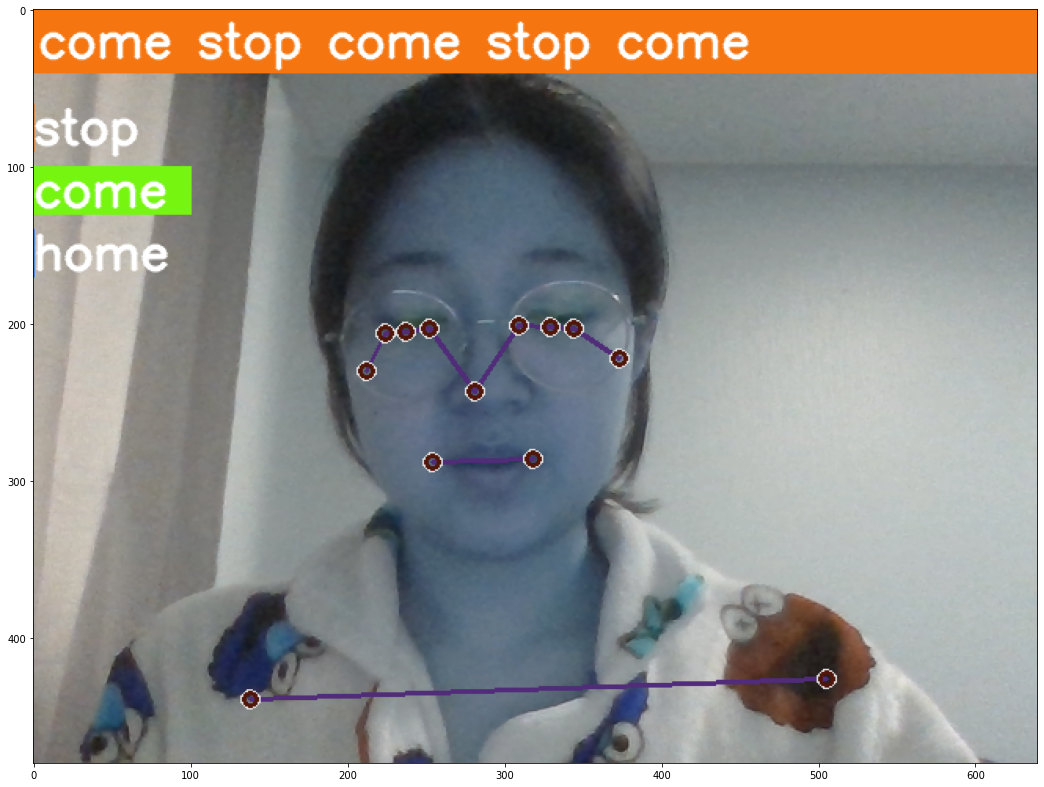

In [83]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [84]:
sequence.reverse()

In [85]:
len(sequence)

30

In [86]:
sequence.append('def')

In [87]:
sequence.reverse()

In [88]:
sequence[-30:]

[array([ 5.03930330e-01,  5.29784739e-01, -1.12010396e+00,  9.99260366e-01,
         5.41840613e-01,  4.53590572e-01, -1.03999209e+00,  9.99021649e-01,
         5.61958253e-01,  4.60043639e-01, -1.04020107e+00,  9.99060273e-01,
         5.81315637e-01,  4.67588395e-01, -1.04014552e+00,  9.98832643e-01,
         4.69965398e-01,  4.44455504e-01, -1.03880453e+00,  9.99012351e-01,
         4.44396019e-01,  4.44874942e-01, -1.03819346e+00,  9.99168217e-01,
         4.20973718e-01,  4.47692484e-01, -1.03868377e+00,  9.99183953e-01,
         6.09983802e-01,  5.12430012e-01, -5.39444864e-01,  9.99205947e-01,
         3.90897781e-01,  4.95331764e-01, -5.18155217e-01,  9.99415576e-01,
         5.41928232e-01,  6.28141761e-01, -9.32551980e-01,  9.99315381e-01,
         4.52408701e-01,  6.17758036e-01, -9.29260433e-01,  9.99426246e-01,
         7.54920304e-01,  9.06435072e-01, -2.78356969e-01,  9.91851509e-01,
         2.26488754e-01,  8.86071265e-01, -2.90254295e-01,  9.95248377e-01,
         9.2

In [89]:
cap.release();
cv2.destroyAllWindows()

In [90]:
res[np.argmax(res)] > threshold

True

In [92]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[1., 0., 0.]], dtype=float32)